# 전체 Action Opportunity map 시각화  
- 위에서 정의한 actor_insight.csv 파일 불러와서 전체 데이터 concat
- zip 파일로 전체 다운로드

In [3]:
#%matplotlib inline

import os
import json

from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm


#zip파일 한방에 다 불러오기
from io import BytesIO
import io
import zipfile
from zipfile import ZipFile
import pandas as pd
import requests
import tensorflow as tf

# 전체 action 점수 concat하기

In [4]:
result = pd.read_csv('KB_감성_기회점수.csv')
result.head()

,Unnamed: 0,action,sent score,imp score,opp score,scaled_imp_score,scaled_sent_score,scaled_opp_score
0,0,Cluster1_actor1_action1,6.3717,5.4845,5.4845,5.749890,8.883671,5.7499
1,1,Cluster1_actor1_action2,5.4528,5.7569,6.0610,7.335887,3.730036,10.9417
2,2,Cluster1_actor1_action3,5.3733,5.1684,5.1684,3.722805,3.221879,4.2237
3,3,Cluster1_actor1_action4,5.1829,5.5315,5.8801,6.046445,2.173590,9.9193
4,4,Cluster1_actor1_action5,5.4795,5.2904,5.2904,4.491373,3.907897,5.0748


In [5]:
result.reset_index(drop=True,inplace=True)

In [6]:
opp_score = []

for i in result.index:
    opp = result.scaled_imp_score[i]+max(result.scaled_imp_score[i]- result['sent score'][i],0)
    opp_score.append(round(opp,4))
print('★액션의 기회영역 점수(x10 해서 CAM에 입력):',opp_score)

★액션의 기회영역 점수(x10 해서 CAM에 입력): [5.7499, 9.219, 3.7228, 6.91, 4.4914, 4.2833, 3.2942, 3.348, 13.6974, 13.9422, 5.5846, 3.8628, 3.1237, 3.2454, 3.2873, 8.6895, 6.2522, 5.2278, 3.0143, 5.1164, 4.6935, 5.6803, 7.4673, 4.2405, 4.8047, 4.8797, 5.3487, 10.7108, 3.5855, 10.9468, 3.1114, 4.0512, 3.2425, 3.4487, 2.9608, 3.193, 7.8826, 5.2232, 3.8055, 7.4381, 4.1199, 3.4134, 10.3608, 5.5685, 4.6175, 5.3831, 4.7143, 3.2913, 5.2681, 11.0274, 8.1893, 4.229, 4.9609, 5.4038, 4.2692, 14.1525, 0.0034, 12.5728, 0.1101, 8.5807, 0.4368, 0.4687]


In [7]:
result['scaled_opp_score'] = opp_score
result

,Unnamed: 0,action,sent score,imp score,opp score,scaled_imp_score,scaled_sent_score,scaled_opp_score
0,0,Cluster1_actor1_action1,6.3717,5.4845,5.4845,5.749890,8.883671,5.7499
1,1,Cluster1_actor1_action2,5.4528,5.7569,6.0610,7.335887,3.730036,9.2190
2,2,Cluster1_actor1_action3,5.3733,5.1684,5.1684,3.722805,3.221879,3.7228
3,3,Cluster1_actor1_action4,5.1829,5.5315,5.8801,6.046445,2.173590,6.9100
4,4,Cluster1_actor1_action5,5.4795,5.2904,5.2904,4.491373,3.907897,4.4914
...,...,...,...,...,...,...,...,...
57,57,Cluster6_actor2_action2,7.4258,9.0226,10.6194,9.999276,9.936269,12.5728
58,58,Cluster6_actor2_action3,5.7356,3.6447,3.6447,0.110123,5.692588,0.1101
59,59,Cluster6_actor2_action4,5.5389,5.7044,5.8699,7.059799,4.313507,8.5807
60,60,Cluster6_actor2_action5,5.6751,4.1857,4.1857,0.436785,5.269916,0.4368


In [8]:
import re

# 주어진 문자열
text_list = result.action.tolist()

# 정규 표현식을 사용하여 각 문자열에서 숫자만 추출하여 리스트로 저장
name = []

for text in text_list:
    numbers = re.findall(r'\d+', text)
    result_ = '_'.join(numbers)
    name.append(result_)

print(name)

['1_1_1', '1_1_2', '1_1_3', '1_1_4', '1_1_5', '1_1_6', '1_2_1', '1_2_2', '1_2_3', '1_3_1', '1_3_2', '1_3_3', '1_3_4', '1_3_5', '1_3_6', '2_1_1', '2_1_2', '2_1_3', '2_1_4', '2_1_5', '2_1_6', '2_2_1', '2_2_2', '2_2_3', '2_2_4', '2_2_5', '2_2_6', '3_2_1', '3_2_2', '3_2_3', '3_2_4', '3_2_5', '3_2_6', '3_2_7', '3_2_8', '4_2_1', '4_2_2', '4_2_3', '4_2_4', '4_2_5', '4_2_6', '4_2_7', '5_1_1', '5_1_2', '5_1_3', '5_1_4', '5_1_5', '5_1_6', '5_2_1', '5_2_2', '5_2_3', '5_2_4', '5_2_5', '5_3_1', '5_3_2', '5_3_3', '6_2_1', '6_2_2', '6_2_3', '6_2_4', '6_2_5', '6_2_6']


In [9]:
NAME=[]
for item in name:
    result_=eval(item)
    NAME.append(result_)
print(len(NAME))

62


In [37]:
def visualize(result):
    '''
    df= 전체 데이터
    importance = importance가 있는 열이름 (str형식으로 넣어야함)
    satisfaction= satisfaction가 있는 열이름 (str형식으로 넣어야함)
    '''
    jwapyo=[*zip(result['scaled_imp_score'], result['scaled_sent_score'])]
    x, y = zip(*jwapyo)
    ddex = NAME

    plt.figure(figsize=(8, 8))
    
    for i in range(len(x)):
        plt.scatter(x[i], y[i], label=ddex[i])
        plt.text(x[i]+0.1, y[i]-0.1, ddex[i], fontsize=8, ha='right',alpha=0.7, rotation=45)


    plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))

    #만족도 기준선
    xdata = [0, 10]
    ydata = [result['scaled_sent_score'].mean(), 10]
    plt.plot(xdata, ydata, 'k')

    #중요도 기준선
    x_data = [result['scaled_imp_score'].mean(), 10]
    y_data = [0, 10]
    plt.plot(x_data, y_data, 'k')

    # x = [0,10]
    # y = np.full_like(x, 5)
    # plt.plot(x, y, '--', color='gray')
    # # Add a horizontal line at y = 5
    plt.axhline(y=5, color='gray', linestyle='--', label='y = 5')

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Satisfaction", fontsize = 12)

    # legend 위치 조정 (그래프 밖에 위치)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig1 = plt.gcf()

    plt.show()
    fig1.savefig('[KB]전체_opp_map')  ##이미지 파일 저장

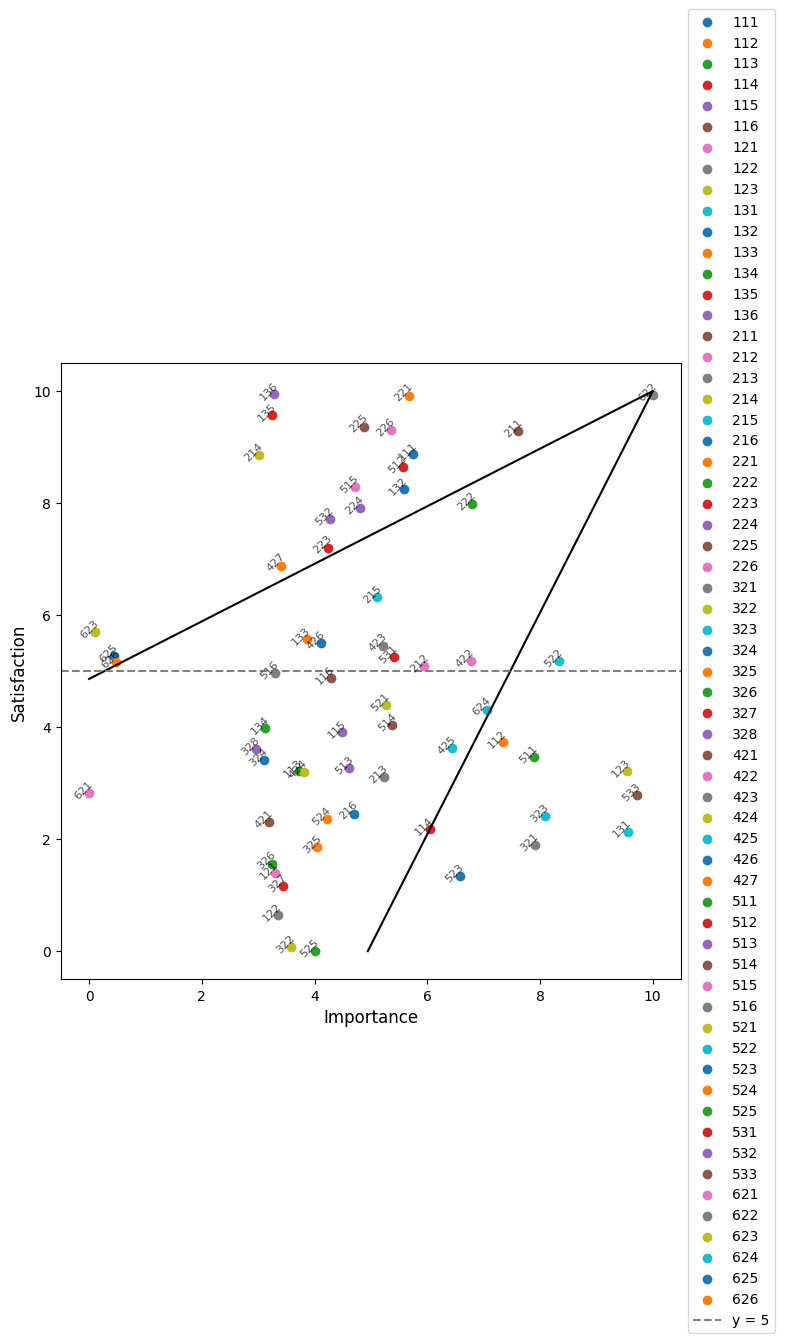

In [38]:
visualize(result)  

# 선분 위에 있는거 색 바꾸기(oversereved)

In [42]:
def is_point_above_line(point, line):
    # 선분의 두 점
    x1, y1, x2, y2 = line
    # 점의 좌표
    x, y = point
    
    # 선분을 이루는 직선의 방정식: ax + by + c = 0
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    
    # 점 (x, y)가 선분 위에 있는지 여부 확인
    return a * x + b * y + c < 0

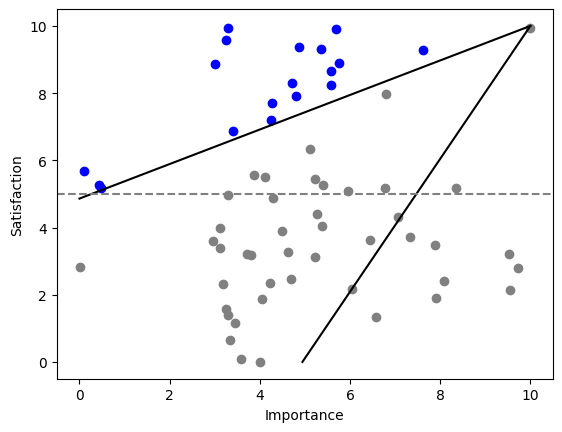

In [43]:
# 샘플 데이터 생성
data = [*zip(result['scaled_imp_score'], result['scaled_sent_score'])]

# 선분의 두 점
line = (0, result['scaled_sent_score'].mean(), 10, 10)
line1 = (result['scaled_imp_score'].mean(), 0 , 10, 10)


# 데이터를 파란색 또는 회색으로 분류하여 저장
blue_points = []
gray_points = []

for point in data:
    if is_point_above_line(point, line):
        blue_points.append(point)
    else:
        gray_points.append(point)

        
# 그래프 그리기
blue_x, blue_y = zip(*blue_points)
gray_x, gray_y = zip(*gray_points)

plt.scatter(blue_x, blue_y, c='blue', label='Above Line')
plt.scatter(gray_x, gray_y, c='gray', label='Below Line')


plt.plot(line[::2], line[1::2], 'k', label='Line')
plt.plot(line1[::2], line1[1::2], 'k', label='Line')

# Add a horizontal line at y = 5
plt.axhline(y=5, color='gray', linestyle='--', label='y = 5')

#plt.legend(loc='right', bbox_to_anchor=(1, 1.1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')
plt.show()

# 선분 아래있는거 색 바꾸기(underserved)

In [22]:
def is_point_above_line(point, line):
    # 선분의 두 점
    x1, y1, x2, y2 = line
    # 점의 좌표
    x, y = point
    
    # 선분을 이루는 직선의 방정식: ax + by + c = 0
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    
    # 점 (x, y)가 선분 위에 있는지 여부 확인
    return a * x + b * y + c > 0

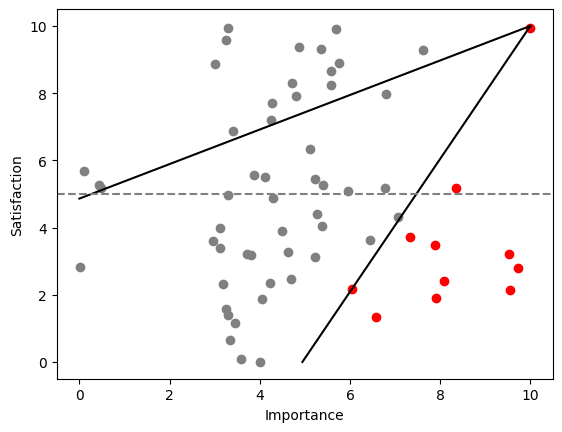

In [39]:
# 샘플 데이터 생성
data = [*zip(result['scaled_imp_score'], result['scaled_sent_score'])]

# 선분의 두 점

line1 = (0, result['scaled_sent_score'].mean(), 10, 10)

line = (result['scaled_imp_score'].mean(), 0 , 10, 10)

# 데이터를 파란색 또는 회색으로 분류하여 저장
blue_points = []
gray_points = []

for point in data:
    if is_point_above_line(point, line):
        blue_points.append(point)
    else:
        gray_points.append(point)

# 그래프 그리기
blue_x, blue_y = zip(*blue_points)
gray_x, gray_y = zip(*gray_points)

plt.scatter(blue_x, blue_y, c='red', label='Above Line')
plt.scatter(gray_x, gray_y, c='gray', label='Below Line')

plt.plot(line[::2], line[1::2], 'k', label='Line')
plt.plot(line1[::2], line1[1::2], 'k', label='Line')

# Add a horizontal line at y = 5
plt.axhline(y=5, color='gray', linestyle='--', label='y = 5')

#plt.legend(loc='right', bbox_to_anchor=(1, 1.1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')
plt.show()

# 중간 영역 점 찍기

In [24]:
def is_point_under_line(point, line):
    # 선분의 두 점
    x1, y1, x2, y2 = line
    # 점의 좌표
    x, y = point
    
    # 선분을 이루는 직선의 방정식: ax + by + c = 0
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    
    # 점 (x, y)가 선분 위에 있는지 여부 확인
    return a * x + b * y + c < 0

In [25]:
def is_point_above_line(point, line):
    # 선분의 두 점
    x1, y1, x2, y2 = line
    # 점의 좌표
    x, y = point
    
    # 선분을 이루는 직선의 방정식: ax + by + c = 0
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    
    # 점 (x, y)가 선분 위에 있는지 여부 확인
    return a * x + b * y + c > 0

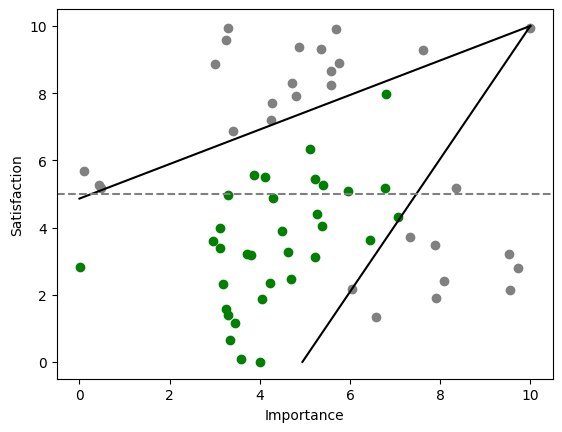

In [41]:
# Updating the code to classify points between the two lines as green

# Assuming 'result' is a dictionary with keys 'scaled_imp_score' and 'scaled_sent_score'
data = [*zip(result['scaled_imp_score'], result['scaled_sent_score'])]

# Lines
line = (0, result['scaled_sent_score'].mean(), 10, 10)
line1 = (result['scaled_imp_score'].mean(), 0, 10, 10)

# Classifying data points
green_points = []
gray_points = []

for point in data:
    if is_point_above_line(point, line) and not is_point_above_line(point, line1):
        green_points.append(point)
    else:
        gray_points.append(point)

# Extracting x and y coordinates
green_x, green_y = zip(*green_points) if green_points else ([], [])
gray_x, gray_y = zip(*gray_points) if gray_points else ([], [])

# Plotting the graph
plt.scatter(green_x, green_y, c='green', label='Between Lines')
plt.scatter(gray_x, gray_y, c='gray', label='Other')

plt.plot(line[::2], line[1::2], 'k', label='Line')
plt.plot(line1[::2], line1[1::2], 'k', label='Line')

# Add a horizontal line at y = 5
plt.axhline(y=5, color='gray', linestyle='--', label='y = 5')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')
plt.show()
